# KNN Classifier with GridSearchCV Tuning

# Read the CSV and Perform Basic Data Cleaning

In [2]:
# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
claims_param = pd.read_csv("./Resources/accident_claimpgsql.csv")
# TEAM_CRASH copy/ML_starter_code_templates/claims_selected_features.csv

# Drop the null columns where all values are null
claims_param1 = claims_param.dropna(axis='columns', how='all')
# Drop the null rows
claims_param1.head()

,age,incident_hour_of_the_day,number_of_vehicles_involved,auto_make,auto_year,state,severity,start_time,end_time,temperature,humidity,visibility,wind_speed,precipitation
0,48,5,1,Saab,2004,NC,2,2019-10-07 17:43:09,2019-10-07 19:42:50,76.0,62.0,10.0,3.0,0.0
1,42,8,1,Mercedes,2007,CA,2,2020-12-13 21:53:00,2020-12-13 22:44:00,51.0,80.0,10.0,6.0,0.0
2,29,7,3,Dodge,2007,NV,2,2018-04-17 16:51:23,2018-04-17 17:50:46,53.6,16.0,10.0,4.6,NaN
3,41,5,1,Chevrolet,2014,FL,3,2016-08-31 17:40:49,2016-08-31 18:10:49,84.2,84.0,10.0,13.8,NaN
4,44,20,1,Accura,2009,NC,3,2018-10-17 16:40:36,2018-10-17 17:10:18,73.4,33.0,10.0,6.9,NaN


In [4]:
claims_param1.columns

Index(['age', 'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'auto_make', 'auto_year', 'state', 'severity', 'start_time', 'end_time',
       'temperature', 'humidity', 'visibility', 'wind_speed', 'precipitation'],
      dtype='object')

In [6]:
# Set features for training & testing. This will also be used as your x values.
claims_trining_features = claims_param1[['age', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'auto_year', 'severity','temperature', 'humidity', 'visibility', 'wind_speed', 'precipitation']].dropna()
# DataFrame with new columns
print(claims_trining_features.columns)

Index(['age', 'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'auto_year', 'severity', 'temperature', 'humidity', 'visibility',
       'wind_speed', 'precipitation'],
      dtype='object')


# Create a Train Test Split

Use 'auto_year' for the y values

In [12]:
# X = selected_features
# y = df['incident_hour_of_the_day']
# print(X.shape, y.shape)

In [7]:
X = claims_trining_features
y = claims_trining_features['severity']
print(X.shape, y.shape)

(549, 10) (549,)


In [8]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [9]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_minmax = MinMaxScaler().fit(X_train)

X_train_minmax = X_minmax.transform(X_train)
X_test_minmax = X_minmax.transform(X_test)

# Train the Model

k: 1, Train/Test Score: 1.000/0.942
k: 3, Train/Test Score: 0.942/0.906
k: 5, Train/Test Score: 0.920/0.891
k: 7, Train/Test Score: 0.883/0.870
k: 9, Train/Test Score: 0.866/0.870
k: 11, Train/Test Score: 0.844/0.870
k: 13, Train/Test Score: 0.818/0.841
k: 15, Train/Test Score: 0.803/0.841
k: 17, Train/Test Score: 0.796/0.819
k: 19, Train/Test Score: 0.793/0.819
k: 21, Train/Test Score: 0.788/0.819
k: 23, Train/Test Score: 0.783/0.819
k: 25, Train/Test Score: 0.781/0.819
k: 27, Train/Test Score: 0.779/0.819
k: 29, Train/Test Score: 0.779/0.819


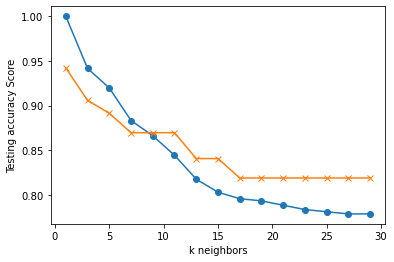

In [10]:
from sklearn.neighbors import KNeighborsClassifier
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_minmax, y_train)
    train_score = knn.score(X_train_minmax, y_train)
    test_score = knn.score(X_test_minmax, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 30, 2), train_scores, marker='o')
plt.plot(range(1, 30, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [11]:
# Note that k: 19 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train_minmax, y_train)
print('k=19 Train Acc: %.3f' % knn.score(X_train_minmax, y_train))
print('k=19 Test Acc: %.3f' % knn.score(X_test_minmax, y_test))

k=19 Train Acc: 0.793
k=19 Test Acc: 0.819


In [12]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 19,
 'p': 2,
 'weights': 'uniform'}

In [13]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
weight_options = ["uniform", "distance"]
metrics = ['euclidean', 'manhattan', 'minkowski']

param_grid = dict(n_neighbors = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29], weights = weight_options, metric=metrics)

grid = GridSearchCV(knn, param_grid, cv = 5, scoring = 'accuracy', verbose=3)
grid.fit(X_train_minmax, y_train)

e=   0.0s
[CV 1/5] END metric=manhattan, n_neighbors=13, weights=uniform; total time=   0.0s
[CV 2/5] END metric=manhattan, n_neighbors=13, weights=uniform; total time=   0.0s
[CV 3/5] END metric=manhattan, n_neighbors=13, weights=uniform; total time=   0.0s
[CV 4/5] END metric=manhattan, n_neighbors=13, weights=uniform; total time=   0.0s
[CV 5/5] END metric=manhattan, n_neighbors=13, weights=uniform; total time=   0.0s
[CV 1/5] END metric=manhattan, n_neighbors=13, weights=distance; total time=   0.0s
[CV 2/5] END metric=manhattan, n_neighbors=13, weights=distance; total time=   0.0s
[CV 3/5] END metric=manhattan, n_neighbors=13, weights=distance; total time=   0.0s
[CV 4/5] END metric=manhattan, n_neighbors=13, weights=distance; total time=   0.0s
[CV 5/5] END metric=manhattan, n_neighbors=13, weights=distance; total time=   0.0s
[CV 1/5] END metric=manhattan, n_neighbors=15, weights=uniform; total time=   0.0s
[CV 2/5] END metric=manhattan, n_neighbors=15, weights=uniform; total ti

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=3)

In [14]:
# Single best score achieved across all params (k)
print(grid.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

0.9027622685865413
{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
KNeighborsClassifier(metric='manhattan', n_neighbors=1)


In [15]:
knn = KNeighborsClassifier(n_neighbors=29, weights='distance', metric='manhattan')
knn.fit(X_train_minmax, y_train)
print('k=29 Train Acc: %.3f' % knn.score(X_train_minmax, y_train))
print('k=29 Test Acc: %.3f' % knn.score(X_test_minmax, y_test))

k=29 Train Acc: 1.000
k=29 Test Acc: 0.841


In [16]:
predictions = grid.predict(X_test_minmax)
predictions

array([3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 2, 3, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2,
       2, 2, 2, 2, 2, 2])

In [17]:
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test.tolist()}).reset_index(drop=True)
results

,Prediction,Actual
0,3,2
1,2,2
2,2,2
3,2,2
4,2,3
...,...,...
133,2,2
134,2,2
135,2,2
136,2,2


In [18]:
results.head(10)

,Prediction,Actual
0,3,2
1,2,2
2,2,2
3,2,2
4,2,3
5,2,2
6,2,2
7,2,2
8,2,2
9,2,2


In [19]:
results.tail(10)

,Prediction,Actual
128,2,2
129,3,3
130,2,2
131,2,2
132,2,2
133,2,2
134,2,2
135,2,2
136,2,2
137,2,2


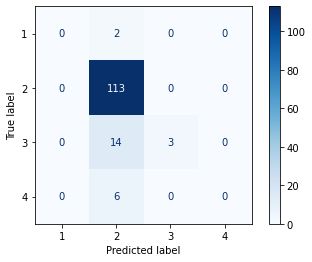

In [20]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test_minmax, y_test, cmap="Blues")
plt.show()

In [21]:
# from sklearn.metrics import classification_report
# print(classification_report(y_test, predictions,
#                             target_names=['class 1(age)', 'class 2(total_claim_amount)', 'class 3(auto_year)','class 4(incident_hour_of_the_day)', 'class 5(injury_claim)','class 6(property_claim)', 'class 7(property_claim)', 'class 8(vehicle_claim)']


In [22]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'Adebayo_KNN10.sav'
joblib.dump(knn, filename)

['Adebayo_KNN10.sav']